# Imports and functions

In [1]:
import os

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
STORE_NUM = 10

In [3]:
def read_store_data(file_name="revenue_train_dataset_by_date_store.csv"):
    df = read_data(file_name)
    df = df.drop(columns=["Unnamed: 0"])
    df = df.sort_values(by=["store_id", "date"])
    df["date"] = pd.to_datetime(df["date"])
    df = df.reset_index(drop=True)
    return df


def read_data(file_name):
    current_dir = os.getcwd()
    project_dir = os.path.dirname(os.path.dirname(current_dir))
    data_path = os.path.join(project_dir, "Datasets", file_name)
    df = pd.read_csv(data_path)
    return df

In [4]:
revenue = read_store_data(file_name="revenue_train_dataset_by_date_store.csv")
revenue


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,10933.16
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,CA_1,9787.06
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,CA_1,7201.38
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,CA_1,7407.74
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,CA_1,6566.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0,WI_3,9341.89
19126,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0,WI_3,9212.23
19127,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0,WI_3,10959.56
19128,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0,WI_3,13120.79


In [5]:
revenue.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
19125,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0,WI_3,9341.89
19126,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0,WI_3,9212.23
19127,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0,WI_3,10959.56
19128,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0,WI_3,13120.79
19129,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,WI_3,12892.99


# Sample store: CA_1

In [6]:
store_name = "CA_1"

In [7]:
store_data = revenue[revenue["store_id"] == store_name]
store_data


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,10933.16
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,CA_1,9787.06
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,CA_1,7201.38
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,CA_1,7407.74
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,CA_1,6566.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0,CA_1,12347.85
1909,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0,CA_1,11687.99
1910,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0,CA_1,14205.08
1911,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0,CA_1,18317.93


# EDA

## Basic statistics

In [8]:
# Basic statistics
print("Basic Statistics:")
print(store_data["revenue"].describe())


Basic Statistics:
count     1913.000000
mean     11772.217658
std       3184.300581
min          0.000000
25%       9589.890000
50%      11487.710000
75%      13582.660000
max      22218.080000
Name: revenue, dtype: float64


In [9]:
# Check for missing values
print("\nMissing Values:")
print(store_data.isnull().sum())



Missing Values:
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1759
event_type_1    1759
event_name_2    1909
event_type_2    1909
snap_CA            0
snap_TX            0
snap_WI            0
store_id           0
revenue            0
dtype: int64


## Cyclicality / Sesasonality

In [10]:
# Create subplots for different analyses
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        "Daily Revenue",
        "Weekly Average Revenue",
        "Monthly Average Revenue",
    ),
    vertical_spacing=0.1,
)

# Daily revenue
fig.add_trace(
    go.Scatter(
        x=store_data["date"],
        y=store_data["revenue"],
        mode="lines",
        name="Daily Revenue",
    ),
    row=1,
    col=1,
)

# Weekly average
weekly_avg = store_data.groupby("wm_yr_wk")["revenue"].mean().reset_index()
fig.add_trace(
    go.Scatter(
        x=store_data.groupby("wm_yr_wk").first()["date"],
        y=weekly_avg["revenue"],
        mode="lines",
        name="Weekly Average",
    ),
    row=2,
    col=1,
)

# Monthly average
monthly_avg = store_data.groupby(["year", "month"])["revenue"].mean().reset_index()
monthly_dates = store_data.groupby(["year", "month"]).first()["date"]
fig.add_trace(
    go.Scatter(
        x=monthly_dates, y=monthly_avg["revenue"], mode="lines", name="Monthly Average"
    ),
    row=3,
    col=1,
)

# Update layout with height parameter
fig.update_layout(
    height=1200, title_text="Revenue Analysis for CA_1 Store", showlegend=True
)

fig.show()

In [11]:
# Analyze seasonality
# Day of week patterns
# Create a mapping for correct weekday order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Calculate average revenue by weekday and reorder
dow_avg = store_data.groupby("weekday")["revenue"].mean().reset_index()
dow_avg["weekday"] = pd.Categorical(
    dow_avg["weekday"], categories=weekday_order, ordered=True
)
dow_avg = dow_avg.sort_values("weekday")

fig = px.bar(dow_avg, x="weekday", y="revenue", title="Average Revenue by Day of Week")
fig.show()


In [12]:
# Monthly patterns
monthly_avg = store_data.groupby("month")["revenue"].mean().reset_index()
fig = px.bar(monthly_avg, x="month", y="revenue", title="Average Revenue by Month")
fig.show()


## Event analysis


In [13]:
# Create a copy of the dataframe
store_events = store_data.copy()

# Create separate rows for each event
events_df1 = store_data[store_data["event_name_1"].notna()][
    ["date", "revenue", "event_name_1"]
].rename(columns={"event_name_1": "event"})
events_df2 = store_data[store_data["event_name_2"].notna()][
    ["date", "revenue", "event_name_2"]
].rename(columns={"event_name_2": "event"})
events_combined = pd.concat([events_df1, events_df2], ignore_index=True)

# Add No Event days
no_event_days = store_data[
    store_data["event_name_1"].isna() & store_data["event_name_2"].isna()
].copy()
no_event_days["event"] = "No Event"
no_event_days = no_event_days[["date", "revenue", "event"]]

# Combine all events and no-event days
all_events = pd.concat([events_combined, no_event_days], ignore_index=True)

# Calculate impact for all events
event_impact = (
    all_events.groupby("event")["revenue"].agg(["mean", "count"]).reset_index()
)

# Sort by mean revenue in descending order
event_impact = event_impact.sort_values("mean", ascending=False)

# Create color list where No Event is a different color
colors = ["#1f77b4" if x != "No Event" else "#ff7f0e" for x in event_impact["event"]]

# Create bar plot
fig = px.bar(
    event_impact,
    x="event",
    y="mean",
    text=event_impact["count"].apply(lambda x: f"n={x}"),  # Add count as text on bars
    title="Average Revenue by Event Type (Including Non-Event Days)",
    labels={"mean": "Average Revenue", "event": "Event Type"},
)

# Update traces with colors and text position
fig.update_traces(marker_color=colors, textposition="auto")

# Improve readability of x-axis labels
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

In [14]:
# Get all events from both columns
events_df1 = store_data[store_data["event_name_1"].notna()][
    ["date", "event_name_1"]
].rename(columns={"event_name_1": "event"})
events_df2 = store_data[store_data["event_name_2"].notna()][
    ["date", "event_name_2"]
].rename(columns={"event_name_2": "event"})
event_dates = pd.concat([events_df1, events_df2], ignore_index=True).drop_duplicates()
event_types = event_dates["event"].unique()

# Calculate average weekly revenue for each event type
event_weekly_avg = []
for event_type in event_types:
    # Get all dates for this event type
    event_type_dates = event_dates[event_dates["event"] == event_type]["date"].unique()

    # Calculate weekly revenue for each occurrence of this event
    event_revenues = []
    for event_date in event_type_dates:
        week_end = pd.to_datetime(event_date)
        week_start = week_end - pd.Timedelta(days=6)
        weekly_rev = store_data[
            (store_data["date"] >= week_start) & (store_data["date"] <= week_end)
        ]["revenue"].sum()
        event_revenues.append(weekly_rev)

    # Calculate average weekly revenue for this event type
    avg_weekly_rev = np.mean(event_revenues)
    event_weekly_avg.append(
        {
            "event": event_type,
            "week_ending": pd.NaT,
            "weekly_revenue": avg_weekly_rev,
            "occurrences": len(event_revenues),
        }
    )

event_weekly_df = pd.DataFrame(event_weekly_avg)

# Calculate average weekly revenue for non-event weeks
non_event_weekly = []
current_date = store_data["date"].min()
end_date = store_data["date"].max()

while current_date <= end_date:
    week_end = current_date + pd.Timedelta(days=6)
    # Skip if week overlaps with any event date
    if not any(
        (week_end >= pd.to_datetime(ed)) & (current_date <= pd.to_datetime(ed))
        for ed in event_dates["date"].unique()
    ):
        weekly_rev = store_data[
            (store_data["date"] >= current_date) & (store_data["date"] <= week_end)
        ]["revenue"].sum()
        non_event_weekly.append(weekly_rev)
    current_date += pd.Timedelta(days=7)

avg_non_event = np.mean(non_event_weekly)

# Create a separate DataFrame for non-event average with matching columns
non_event_df = pd.DataFrame(
    [
        {
            "event": "Average Non-Event Week",
            "week_ending": pd.NaT,
            "weekly_revenue": avg_non_event,
            "occurrences": len(non_event_weekly),
        }
    ]
)

# Ensure both DataFrames have the same dtypes before concatenation
for col in event_weekly_df.columns:
    non_event_df[col] = non_event_df[col].astype(event_weekly_df[col].dtype)

# Concatenate the DataFrames
event_weekly_df = pd.concat([event_weekly_df, non_event_df], ignore_index=True)

# Sort by weekly revenue in descending order
event_weekly_df = event_weekly_df.sort_values("weekly_revenue", ascending=False)

# Add occurrence text
event_weekly_df["text"] = event_weekly_df["occurrences"].apply(lambda x: f"n={x}")

# Create bar plot with text included
fig = px.bar(
    event_weekly_df,
    x="event",
    y="weekly_revenue",
    text="text",  # Add the occurrence counts as text
    title="Average Weekly Revenue by Event Type vs Non-Event Weeks",
    labels={"weekly_revenue": "Average Weekly Revenue", "event": "Event Type"},
)

# Color the average non-event bar differently
colors = [
    "#1f77b4" if x != "Average Non-Event Week" else "#ff7f0e"
    for x in event_weekly_df["event"]
]
fig.update_traces(marker_color=colors, textposition="auto")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

## Snap

In [15]:
# SNAP analysis
snap_impact = store_data.groupby("snap_CA")["revenue"].mean().reset_index()
fig = px.bar(
    snap_impact,
    x="snap_CA",
    y="revenue",
    title="Average Revenue on SNAP vs Non-SNAP Days (California)",
    labels={"snap_CA": "SNAP Day", "revenue": "Average Revenue"},
)

# Update x-axis labels
fig.update_xaxes(ticktext=["Non-SNAP Day", "SNAP Day"], tickvals=[0, 1])

fig.show()


# Tests for stationarity

In [16]:
data = revenue[["date", "revenue", "store_id"]]

data


,date,revenue,store_id
0,2011-01-29,10933.16,CA_1
1,2011-01-30,9787.06,CA_1
2,2011-01-31,7201.38,CA_1
3,2011-02-01,7407.74,CA_1
4,2011-02-02,6566.12,CA_1
...,...,...,...
19125,2016-04-20,9341.89,WI_3
19126,2016-04-21,9212.23,WI_3
19127,2016-04-22,10959.56,WI_3
19128,2016-04-23,13120.79,WI_3


In [17]:
data = data.pivot(index="date", columns="store_id", values="revenue")
data.fillna(0, inplace=True)
data.index = data.index.date
data


store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29,10933.16,9101.52,11679.83,4561.59,6586.68,9915.78,7597.99,6454.72,5451.46,9367.88
2011-01-30,9787.06,8417.53,12161.46,4681.41,6610.60,9804.54,7356.54,5645.77,4636.86,9868.80
2011-01-31,7201.38,5320.51,9123.86,3637.98,4551.97,6651.16,5406.70,3640.12,4621.58,7551.65
2011-02-01,7407.74,5550.56,10249.78,3708.92,5374.39,6985.60,5597.97,2949.96,5754.75,7181.53
2011-02-02,6566.12,5229.72,9538.65,3841.14,4347.07,6039.05,4069.74,2.96,2679.19,4646.31
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,12347.85,11564.22,18113.40,7978.28,8950.16,11278.96,11092.53,9949.23,12212.21,9341.89
2016-04-21,11687.99,10746.54,16230.51,8169.58,8260.00,11409.73,11535.43,10361.39,12796.87,9212.23
2016-04-22,14205.08,14654.14,18491.01,8301.77,9499.88,12494.57,11889.90,12292.56,14251.83,10959.56
2016-04-23,18317.93,19846.12,24861.53,9911.55,11373.50,14575.46,13093.63,14332.14,15761.02,13120.79


## Stationarity test

In [18]:
store_ids = list(revenue["store_id"].unique())
store_ids

['CA_1',
 'CA_2',
 'CA_3',
 'CA_4',
 'TX_1',
 'TX_2',
 'TX_3',
 'WI_1',
 'WI_2',
 'WI_3']

In [19]:
sample_store = data[store_ids[0]]
sample_store

2011-01-29    10933.16
2011-01-30     9787.06
2011-01-31     7201.38
2011-02-01     7407.74
2011-02-02     6566.12
                ...   
2016-04-20    12347.85
2016-04-21    11687.99
2016-04-22    14205.08
2016-04-23    18317.93
2016-04-24    20029.72
Name: CA_1, Length: 1913, dtype: float64

In [20]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Suppress only the InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)


def test_stationarity(data, store_ids):
    # Initialize an empty list to store results
    stationary_test_results = []

    for store in store_ids:
        store_data = data[store]

        # ADF Test
        # p-values < 0.05 means stationary
        adf_result = adfuller(store_data)
        adf_stat = adf_result[0]
        adf_p_value = adf_result[1]

        # KPSS Test
        # p-value < 0.05 means NON stationary (unit root)
        kpss_result = kpss(store_data)
        kpss_stat = kpss_result[0]
        kpss_p_value = kpss_result[1]

        # Append results as a dictionary
        stationary_test_results.append(
            {
                "Store": store,
                "ADF Statistic": adf_stat,
                "ADF p-value": adf_p_value,
                "KPSS Statistic": kpss_stat,
                "KPSS p-value": kpss_p_value,
            }
        )

    # Create a DataFrame from the results
    stationary_test_results_df = pd.DataFrame(stationary_test_results)

    # Set 'Store' as the index
    stationary_test_results_df.set_index("Store", inplace=True)

    return stationary_test_results_df

In [21]:
# No series meet the stationarity requirement
data_stationarity_results = test_stationarity(data, store_ids)

In [22]:
data_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-1.472895,0.546875,9.103389,0.01
CA_2,0.310142,0.977805,4.945860,0.01
CA_3,-1.757247,0.401884,6.695425,0.01
CA_4,-1.009197,0.749895,6.875601,0.01
TX_1,-1.526438,0.520395,7.410471,0.01
TX_2,-2.058534,0.261512,5.705055,0.01
TX_3,-0.990839,0.756591,6.749589,0.01
WI_1,-0.956681,0.768734,7.143716,0.01
WI_2,-0.662196,0.856300,6.086058,0.01


# Modeling - VAR / VARMA / VARMAX

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


## VAR

In [24]:
var_data = np.log(data + 1).diff().dropna()
var_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-30,-0.110729,-0.078116,0.040405,0.025922,0.003624,-0.011281,-0.032290,-0.133883,-0.161814,0.052086
2011-01-31,-0.306752,-0.458678,-0.287352,-0.252110,-0.373046,-0.388006,-0.307902,-0.438792,-0.003300,-0.267581
2011-02-01,0.028249,0.042322,0.116351,0.019307,0.166051,0.049052,0.034759,-0.210161,0.219246,-0.050247
2011-02-02,-0.120585,-0.059530,-0.071897,0.035019,-0.212099,-0.145582,-0.318758,-6.613642,-0.764312,-0.435363
2011-02-03,0.190685,0.090098,0.087143,-0.115962,0.442890,0.325553,0.524352,7.054495,0.672677,0.770027
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,-0.014702,0.009681,-0.038941,-0.113873,-0.169031,-0.078608,-0.201393,0.091157,-0.031830,-0.013904
2016-04-21,-0.054916,-0.073325,-0.109753,0.023692,-0.080237,0.011526,0.039148,0.040587,0.046761,-0.013975
2016-04-22,0.195023,0.310114,0.130384,0.016049,0.139839,0.090820,0.030264,0.170893,0.107677,0.173663
2016-04-23,0.254265,0.303268,0.296023,0.177212,0.179990,0.154034,0.096429,0.153499,0.100648,0.179971


### Stationarity test

In [25]:
var_stationarity_results = test_stationarity(var_data, store_ids)

In [26]:
var_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-16.549476,1.950987e-29,0.028091,0.1
CA_2,-15.689897,1.438130e-28,0.044572,0.1
CA_3,-16.166057,4.414535e-29,0.028039,0.1
CA_4,-15.254667,4.954493e-28,0.046731,0.1
TX_1,-16.624575,1.686548e-29,0.031244,0.1
TX_2,-16.399068,2.648983e-29,0.031658,0.1
TX_3,-16.539746,1.988839e-29,0.030256,0.1
WI_1,-15.362660,3.595233e-28,0.041308,0.1
WI_2,-18.946311,0.000000e+00,0.195799,0.1


### Modeling

In [27]:
var_model = VAR(var_data, freq="D")


In [28]:
# results = model.fit(maxlags=100, ic="aic")
var_model_fit = var_model.fit(20)
var_model_fit

In [29]:
var_lag_order = var_model_fit.k_ar
var_lag_order

20

In [30]:
var_predictions = var_model_fit.forecast(var_data.values[-var_lag_order:], 28)
var_predictions

array([[-4.98526066e-01, -5.51089880e-01, -4.06299156e-01,
        -3.27901766e-01, -4.26605758e-01, -2.96453329e-01,
        -2.23873188e-01, -5.32148405e-01, -3.81663960e-01,
        -4.69166872e-01],
       [ 1.10297429e-01,  1.06695799e-01,  1.07942854e-01,
         1.54240995e-01,  1.05637359e-01,  4.11623617e-02,
         9.95853217e-02,  1.96506029e-01,  2.62690753e-01,
         2.25216957e-01],
       [ 1.33210995e-03,  7.91985512e-03, -2.11733250e-02,
        -1.53192926e-02,  7.57862285e-02,  6.33844932e-02,
         6.46864079e-03,  5.04866099e-02,  1.57501873e-02,
        -1.90158069e-03],
       [-1.90696635e-01, -1.68270316e-01, -1.68166891e-01,
        -1.66487210e-01, -2.40722121e-01, -1.31283869e-01,
        -1.57533874e-01, -1.34536838e-01, -1.13874839e-01,
        -1.51378823e-01],
       [ 2.37753445e-01,  2.84505539e-01,  1.35185331e-01,
         1.14687541e-01,  1.48032992e-01,  1.03296625e-01,
         1.25368256e-01,  2.46601484e-01,  2.10567043e-01,
         2.

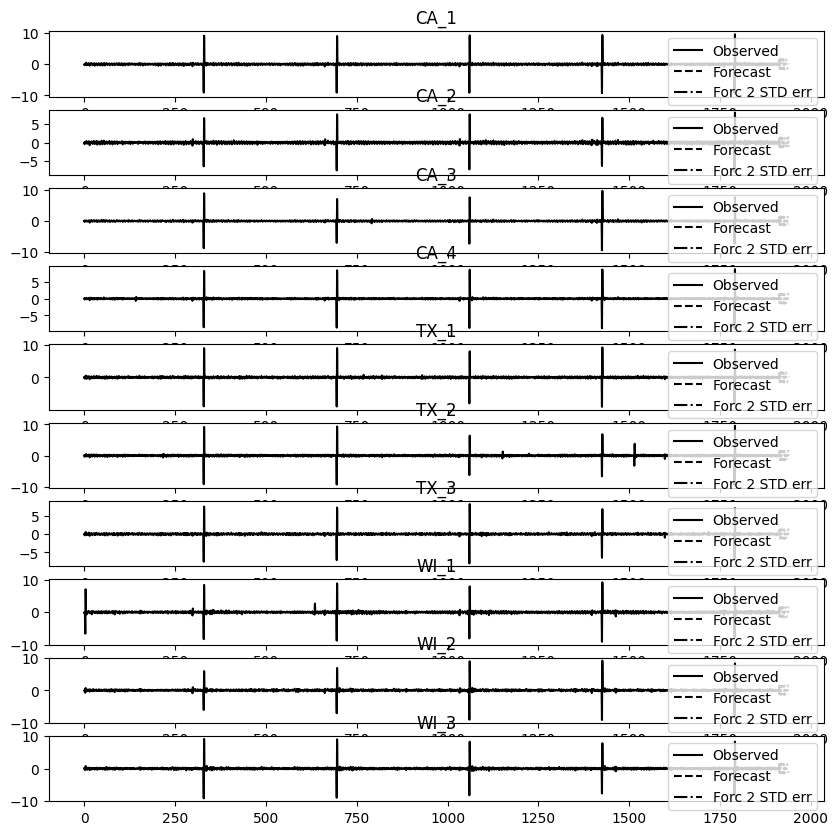

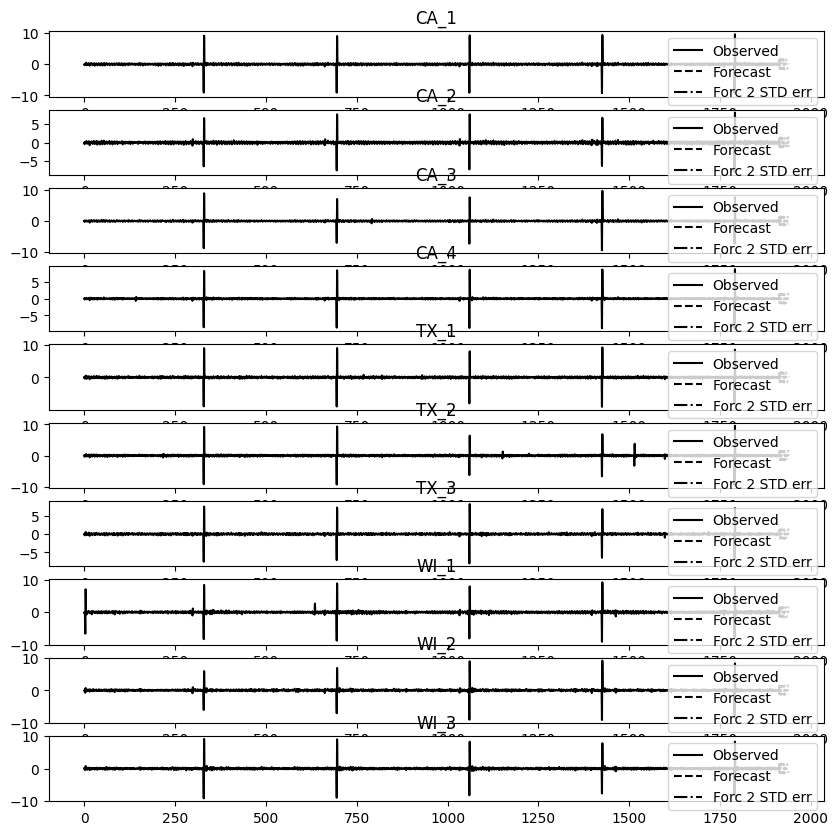

In [31]:
var_model_fit.plot_forecast(28)

In [32]:
var_predictions

array([[-4.98526066e-01, -5.51089880e-01, -4.06299156e-01,
        -3.27901766e-01, -4.26605758e-01, -2.96453329e-01,
        -2.23873188e-01, -5.32148405e-01, -3.81663960e-01,
        -4.69166872e-01],
       [ 1.10297429e-01,  1.06695799e-01,  1.07942854e-01,
         1.54240995e-01,  1.05637359e-01,  4.11623617e-02,
         9.95853217e-02,  1.96506029e-01,  2.62690753e-01,
         2.25216957e-01],
       [ 1.33210995e-03,  7.91985512e-03, -2.11733250e-02,
        -1.53192926e-02,  7.57862285e-02,  6.33844932e-02,
         6.46864079e-03,  5.04866099e-02,  1.57501873e-02,
        -1.90158069e-03],
       [-1.90696635e-01, -1.68270316e-01, -1.68166891e-01,
        -1.66487210e-01, -2.40722121e-01, -1.31283869e-01,
        -1.57533874e-01, -1.34536838e-01, -1.13874839e-01,
        -1.51378823e-01],
       [ 2.37753445e-01,  2.84505539e-01,  1.35185331e-01,
         1.14687541e-01,  1.48032992e-01,  1.03296625e-01,
         1.25368256e-01,  2.46601484e-01,  2.10567043e-01,
         2.

In [33]:
last_actual_value = data.iloc[[-1], :]
last_actual_value = np.log(last_actual_value + 1)
last_actual_value

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2016-04-24,9.905022,9.928881,10.203621,9.301344,9.473646,9.595435,9.539976,9.606426,9.620271,9.464517


In [34]:
var_processed_prediction = pd.DataFrame(var_predictions)
var_processed_prediction.columns = data.columns
var_processed_prediction = (
    np.exp(pd.concat([last_actual_value, var_processed_prediction]).cumsum()) - 1
)
var_processed_prediction = var_processed_prediction.iloc[1:,]
var_processed_prediction

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
0,12166.166209,11821.875113,17984.506309,7889.716758,8492.360113,10925.883438,11114.574705,8726.881011,10285.697850,8064.489787
1,13584.981087,13153.080600,20034.567760,9205.667681,9438.679747,11385.045025,12278.516797,10622.076297,13376.073954,10101.787711
2,13603.091168,13257.672643,19614.807712,9065.702863,10181.884117,12130.106975,12358.206043,11172.168718,13588.433334,10082.594699
3,11241.193013,11204.240400,16578.531068,7675.175694,8003.358149,10637.602263,10556.825512,9765.697807,12125.797716,8666.071785
4,14258.557418,14891.937396,18978.400319,8608.007231,9280.462706,11795.297773,11966.990116,12497.140835,14968.049969,11319.536682
5,20327.216893,20515.902928,25918.897906,10890.149438,12567.500334,15969.943626,15302.261550,17106.261967,18262.000519,14727.831380
6,17775.831026,17973.586521,23941.579274,9920.575896,11792.536065,14439.644417,14364.319160,13495.633648,15034.189553,12260.658404
7,14406.441867,13131.714081,20971.525534,8897.192236,9952.660274,12087.909626,13205.052875,10405.810906,14819.031906,10905.191154
8,13035.248771,12118.327304,19406.345673,8541.699201,9532.294307,11464.576645,12718.890904,9924.243992,16466.373008,11044.556036
9,14757.821022,13640.709275,21900.081129,9395.038320,10879.939436,12885.995524,13230.272997,11358.416702,17728.802598,11791.701035


<Axes: >

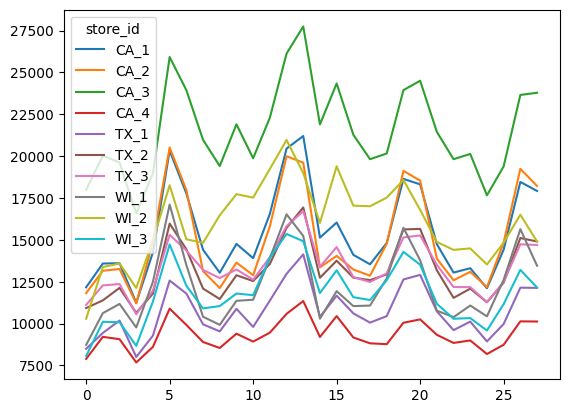

In [35]:
var_processed_prediction.plot()

In [36]:
full_var_data = pd.concat([data, var_processed_prediction])
full_var_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-01-29,10933.160000,9101.520000,11679.830000,4561.590000,6586.680000,9915.780000,7597.990000,6454.720000,5451.460000,9367.880000
2011-01-30,9787.060000,8417.530000,12161.460000,4681.410000,6610.600000,9804.540000,7356.540000,5645.770000,4636.860000,9868.800000
2011-01-31,7201.380000,5320.510000,9123.860000,3637.980000,4551.970000,6651.160000,5406.700000,3640.120000,4621.580000,7551.650000
2011-02-01,7407.740000,5550.560000,10249.780000,3708.920000,5374.390000,6985.600000,5597.970000,2949.960000,5754.750000,7181.530000
2011-02-02,6566.120000,5229.720000,9538.650000,3841.140000,4347.070000,6039.050000,4069.740000,2.960000,2679.190000,4646.310000
...,...,...,...,...,...,...,...,...,...,...
23,13305.493633,13088.062436,20130.869634,8990.707015,10116.646214,12085.666890,12178.770007,11077.350196,14490.128567,10326.637286
24,12111.644968,12173.858662,17659.503403,8179.068717,8931.723923,11272.272427,11279.560763,10430.782079,13526.570374,9583.393272
25,14417.608563,14842.529292,19386.880459,8734.137387,9974.393797,12443.207109,12479.726192,12611.226358,14835.120113,11160.718558
26,18457.205534,19239.293617,23654.299426,10130.475965,12143.549667,15110.421876,14735.139154,15637.664677,16502.141802,13207.520524


<Axes: >

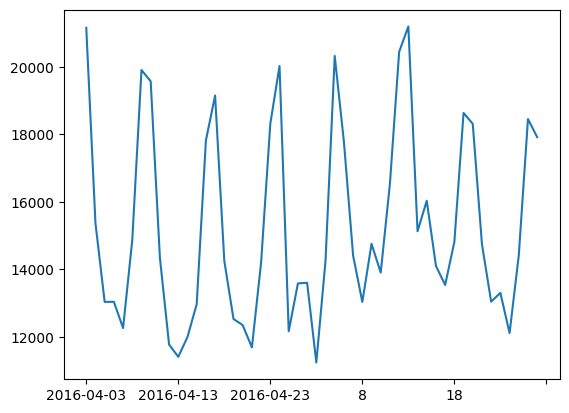

In [37]:
full_var_data.iloc[-50:,].loc[:, "CA_1"].plot()

### Post-estimation analysis


In [38]:
# Get normality test results
var_normality_test = var_model_fit.test_normality()
print(var_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.043e+07          31.41   0.000 20
----------------------------------------


In [39]:
var_whiteness_test = var_model_fit.test_whiteness(nlags=21)
print(var_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 21 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         578.4          124.3   0.000 100
-----------------------------------------


### Submission generation

In [40]:
def generate_submission(submission_file, processed_prediction):
    submission_folder = "D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\seminar_1\Evaluation\Result\Duc"

    calendar = read_data(file_name="calendar.csv")
    calendar = calendar[["d", "date"]]
    calendar.set_index("d", inplace=True)

    test_data = read_store_data(file_name="revenue_test_dataset_by_date_store.csv")
    test_dates = test_data["d"].unique()
    test_dates = test_dates[-28:]

    submission = processed_prediction.copy()
    submission["d"] = test_dates
    submission.index = submission["d"]
    submission = submission.merge(
        calendar, left_index=True, right_index=True, how="left"
    )

    submission.index = submission.index.map(lambda x: x[2:]).astype(int)

    store_cols = [col for col in submission.columns if col not in ["d", "date"]]
    submission = submission[["d", "date"] + store_cols]
    submission.index.name = "id"
    submission.columns.name = None
    submission.to_csv(f"{submission_folder}/{submission_file}")


In [41]:
var_submission_file = "full_var.csv"
generate_submission(var_submission_file, var_processed_prediction)

## VARMA


In [42]:
MA_PERIOD = 7

In [43]:
varma_ma_data = data.rolling(MA_PERIOD).mean().dropna(how="all").fillna(0)
varma_ma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-02-04,8341.135714,6634.535714,10685.847143,3973.905714,5525.195714,7766.785714,5980.785714,4171.970000,4849.608571,8386.755714
2011-02-05,8690.027143,6819.577143,10977.537143,4035.235714,5616.621429,7752.821429,5883.680000,4371.668571,4976.931429,8877.731429
2011-02-06,8804.937143,6801.108571,11306.207143,4039.904286,5796.071429,7799.355714,5912.144286,4140.951429,4996.318571,9051.545714
2011-02-07,8876.817143,6896.335714,11708.582857,4089.502857,5925.260000,7974.047143,5985.557143,4162.210000,5005.915714,9089.714286
2011-02-08,8939.804286,6961.420000,11856.632857,4078.712857,5794.424286,7947.484286,5958.202857,4251.998571,4758.682857,9183.464286
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,14439.512857,14137.242857,20360.478571,8892.961429,10506.617143,12848.260000,12898.662857,11448.962857,14835.828571,11115.115714
2016-04-21,14395.297143,14062.300000,20079.967143,8922.551429,10411.105714,12711.747143,12813.502857,11490.944286,14369.990000,10988.134286
2016-04-22,14571.837143,14058.935714,20215.161429,8949.080000,10384.132857,12759.998571,12698.227143,11503.781429,13796.820000,10803.398571
2016-04-23,14642.654286,14320.334286,20547.127143,9015.092857,10339.678571,12731.204286,12549.614286,11482.697143,13722.635714,10757.962857


In [44]:
varma_data = np.log(varma_ma_data).diff().dropna()
varma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-02-05,0.040977,0.027509,0.026931,0.015315,0.016412,-0.001800,-0.016370,0.046756,0.025916,0.056892
2011-02-06,0.013137,-0.002712,0.029501,0.001156,0.031450,0.005984,0.004826,-0.054219,0.003888,0.019389
2011-02-07,0.008130,0.013905,0.034970,0.012202,0.022044,0.022151,0.012341,0.005121,0.001919,0.004208
2011-02-08,0.007071,0.009393,0.012565,-0.002642,-0.022328,-0.003337,-0.004581,0.021343,-0.050649,0.010261
2011-02-09,0.005919,0.005246,0.016726,-0.016676,0.019618,0.010302,0.021775,0.120752,0.066088,0.053008
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0.009340,-0.002840,0.004202,0.009778,-0.003252,0.000204,-0.010126,0.010436,-0.016360,0.005919
2016-04-21,-0.003067,-0.005315,-0.013873,0.003322,-0.009132,-0.010682,-0.006624,0.003660,-0.031903,-0.011490
2016-04-22,0.012189,-0.000239,0.006710,0.002969,-0.002594,0.003789,-0.009037,0.001117,-0.040704,-0.016955
2016-04-23,0.004848,0.018422,0.016288,0.007349,-0.004290,-0.002259,-0.011772,-0.001834,-0.005391,-0.004215


### Stationary test

In [45]:
# ma data is not stationary
varma_ma_stationarity_results = test_stationarity(varma_ma_data, store_ids)
varma_ma_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-1.062871,0.729649,6.104556,0.010000
CA_2,1.056162,0.994825,3.718654,0.010000
CA_3,-1.560567,0.503366,5.800366,0.010000
CA_4,-0.795933,0.820314,6.393118,0.010000
TX_1,-1.127349,0.704043,5.931597,0.010000
TX_2,-1.635290,0.464723,3.711759,0.010000
TX_3,-0.594787,0.872156,6.280297,0.010000
WI_1,-0.703094,0.845946,6.637743,0.010000
WI_2,0.026076,0.960636,5.870067,0.010000


In [46]:
varma_stationarity_results = test_stationarity(varma_data, store_ids)
varma_stationarity_results

,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
Store,,,,
CA_1,-17.101036,7.476763e-30,0.007577,0.1
CA_2,-15.633566,1.673759e-28,0.037603,0.1
CA_3,-19.751730,0.000000e+00,0.020542,0.1
CA_4,-13.922929,5.255526e-26,0.014796,0.1
TX_1,-19.773264,0.000000e+00,0.011065,0.1
TX_2,-13.005412,2.634088e-24,0.015949,0.1
TX_3,-14.017092,3.626518e-26,0.008529,0.1
WI_1,-12.528744,2.455302e-23,0.010290,0.1
WI_2,-14.504966,5.849349e-27,0.013357,0.1


### Modeling

In [47]:
varma_model = VAR(varma_data, freq="D")


In [48]:
# var_model_fit = varma_model.fit(maxlags=100, ic="aic")
varma_model_fit = varma_model.fit(31)

In [49]:
varma_lag_order = varma_model_fit.k_ar
varma_lag_order

31

In [50]:
varma_predictions = varma_model_fit.forecast(varma_data.values[-varma_lag_order:], 28)
varma_predictions

array([[-5.26744735e-03,  2.81261352e-04, -1.37612350e-02,
        -1.91117040e-02, -2.83258622e-02,  1.51159874e-02,
         8.14985109e-03, -3.71234886e-03, -3.07150738e-02,
        -3.26699228e-02],
       [-8.78471362e-03,  9.33135726e-03, -5.64373724e-03,
        -2.00102728e-02, -2.54319737e-02, -5.19574885e-03,
        -9.80630602e-03,  5.55190445e-03,  1.53881537e-03,
         8.20229676e-03],
       [-2.29980243e-02, -4.65850237e-03, -2.53304324e-02,
        -1.89066280e-02, -5.25258849e-03, -9.41218853e-03,
        -5.26440792e-04, -1.62239403e-02, -4.24727565e-03,
        -1.14800813e-02],
       [-7.88385016e-04,  6.27788033e-03,  2.48517327e-03,
        -5.69927064e-03, -1.01443473e-03, -1.61102757e-04,
        -4.61225620e-03, -1.33074212e-02, -1.60354993e-02,
        -1.53690966e-02],
       [ 2.75434741e-03,  1.05753997e-02,  1.07166522e-03,
         1.94068229e-03, -1.28026730e-04,  3.80103162e-03,
         9.54163575e-03,  1.53601499e-03,  2.12956536e-02,
         4.

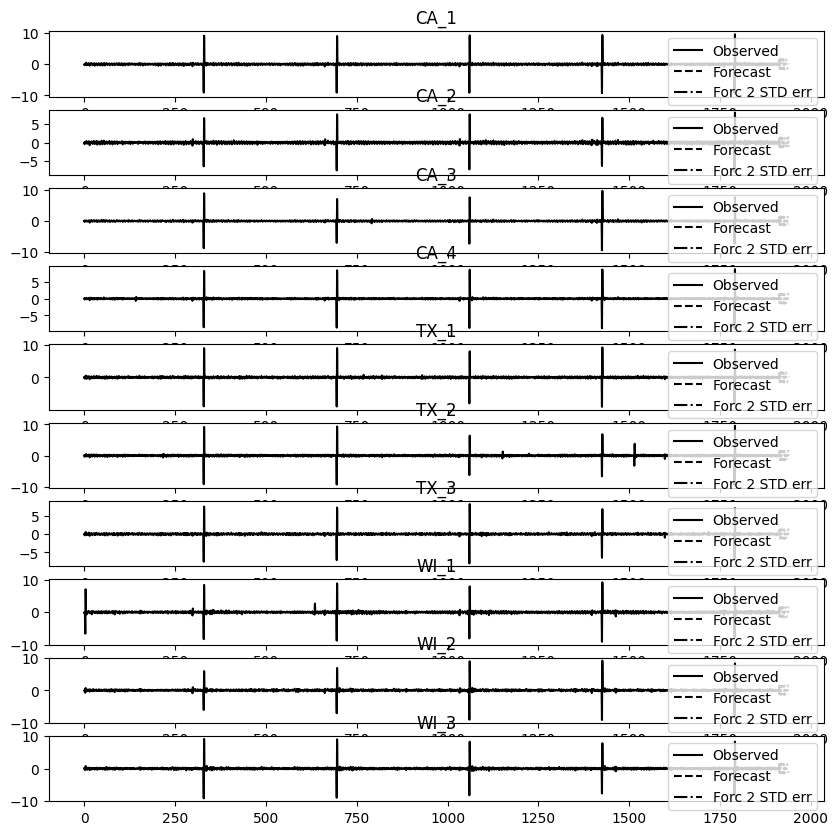

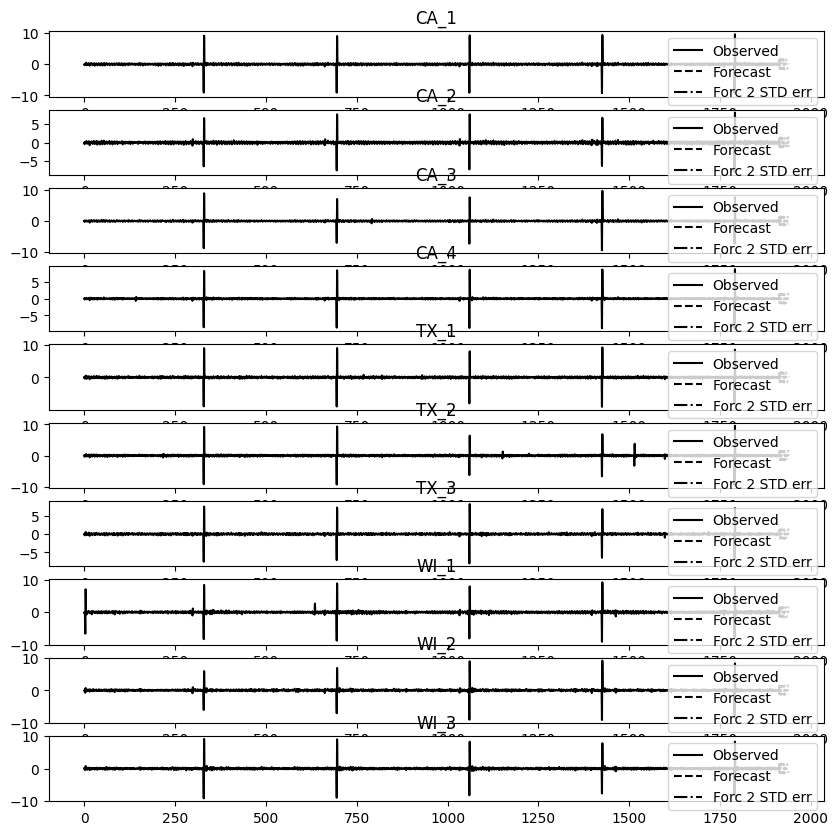

In [51]:
var_model_fit.plot_forecast(28)

In [52]:
varma_predictions

array([[-5.26744735e-03,  2.81261352e-04, -1.37612350e-02,
        -1.91117040e-02, -2.83258622e-02,  1.51159874e-02,
         8.14985109e-03, -3.71234886e-03, -3.07150738e-02,
        -3.26699228e-02],
       [-8.78471362e-03,  9.33135726e-03, -5.64373724e-03,
        -2.00102728e-02, -2.54319737e-02, -5.19574885e-03,
        -9.80630602e-03,  5.55190445e-03,  1.53881537e-03,
         8.20229676e-03],
       [-2.29980243e-02, -4.65850237e-03, -2.53304324e-02,
        -1.89066280e-02, -5.25258849e-03, -9.41218853e-03,
        -5.26440792e-04, -1.62239403e-02, -4.24727565e-03,
        -1.14800813e-02],
       [-7.88385016e-04,  6.27788033e-03,  2.48517327e-03,
        -5.69927064e-03, -1.01443473e-03, -1.61102757e-04,
        -4.61225620e-03, -1.33074212e-02, -1.60354993e-02,
        -1.53690966e-02],
       [ 2.75434741e-03,  1.05753997e-02,  1.07166522e-03,
         1.94068229e-03, -1.28026730e-04,  3.80103162e-03,
         9.54163575e-03,  1.53601499e-03,  2.12956536e-02,
         4.

In [53]:
def process_ma_prediction(data, ma_data, ma_prediction):
    last_actual_ma_value = ma_data.iloc[[-1], :]
    last_actual_ma_value = np.log(last_actual_ma_value + 1)
    last_actual_ma_value
    processed_ma_prediction = pd.DataFrame(ma_prediction)
    processed_ma_prediction.columns = varma_data.columns
    processed_ma_prediction = np.exp(
        pd.concat([last_actual_ma_value, processed_ma_prediction]).cumsum()
    )
    processed_ma_prediction = processed_ma_prediction.iloc[1:,]
    full_data = data.copy()
    for i in range(0, len(processed_ma_prediction)):
        current_row = processed_ma_prediction.iloc[i, :]
        total = current_row * MA_PERIOD

        actual_prediction = total - full_data.iloc[-6:].sum()
        actual_prediction.name = i
        actual_prediction = pd.DataFrame(actual_prediction).T
        # actual_prediction
        full_data = pd.concat([full_data, actual_prediction])
    processed_prediction = full_data.iloc[-28:,]
    return processed_ma_prediction, processed_prediction, full_data

In [54]:
varma_processed_ma_prediction, varma_processed_prediction, varma_full_data = (
    process_ma_prediction(data, varma_ma_data, varma_predictions)
)

<Axes: >

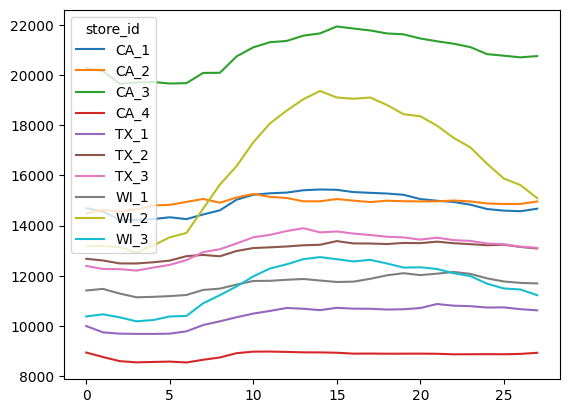

In [55]:
varma_processed_ma_prediction.plot()

<Axes: >

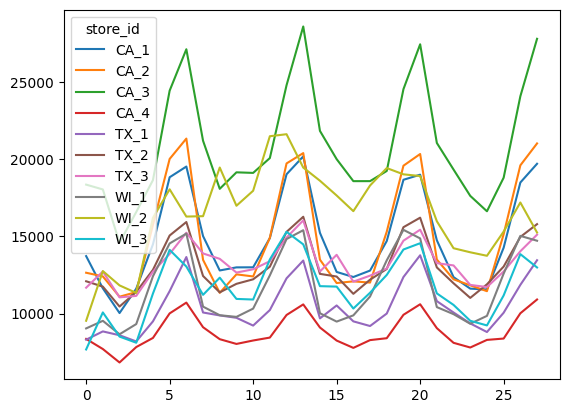

In [56]:
varma_processed_prediction.plot()

<Axes: >

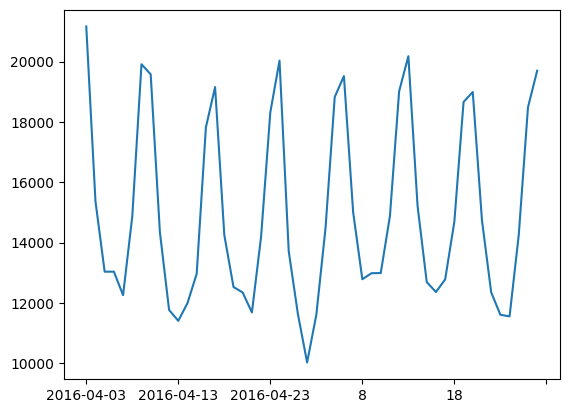

In [57]:
varma_full_data.iloc[-50:,].loc[:, "CA_1"].plot()


#### Alternate ma processing

In [58]:
# Calculate the average daily pattern from historical data
daily_patterns = data.copy()
daily_patterns["dayofweek"] = pd.to_datetime(daily_patterns.index).day_of_week
avg_daily_pattern = daily_patterns.groupby("dayofweek").mean()

# Convert MA predictions to daily values while preserving weekly patterns
full_alternate_varma_data = data.copy()
for i in range(0, len(varma_processed_ma_prediction)):
    current_ma = varma_processed_ma_prediction.iloc[i, :]

    # Get the day of week for this prediction
    prediction_date = full_alternate_varma_data.index[-1] + pd.Timedelta(days=1)
    day_of_week = pd.Timestamp(prediction_date).day_of_week

    # Use historical pattern to distribute the MA value
    daily_ratio = avg_daily_pattern.loc[day_of_week] / avg_daily_pattern.mean()
    actual_prediction = current_ma * daily_ratio

    actual_prediction.name = prediction_date
    actual_prediction = pd.DataFrame(actual_prediction).T
    full_alternate_varma_data = pd.concat(
        [full_alternate_varma_data, actual_prediction]
    )

<Axes: >

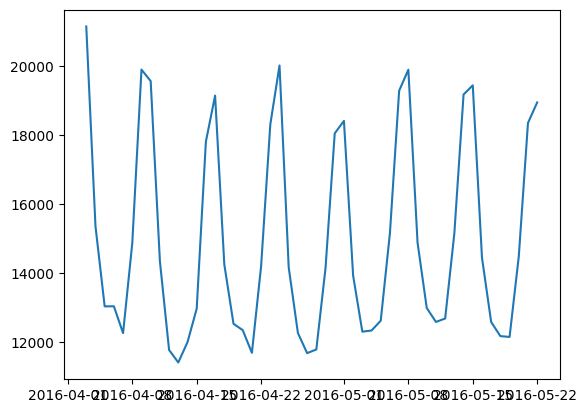

In [59]:
full_alternate_varma_data.iloc[-50:,].loc[:, "CA_1"].plot()


### Post-estimation analysis


In [60]:
# Get normality test results
varma_normality_test = varma_model_fit.test_normality()
print(varma_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     2.632e+06          31.41   0.000 20
----------------------------------------


In [61]:
varma_whiteness_test = varma_model_fit.test_whiteness(nlags=35)
print(varma_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 35 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         1382.          447.6   0.000 400
-----------------------------------------


### Submission generation

In [62]:
varma_submission_file = "full_varma.csv"
generate_submission(varma_submission_file, varma_processed_prediction)

# VARMAX

### Preparing exog data

In [63]:
revenue


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,CA_1,10933.16
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,CA_1,9787.06
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,CA_1,7201.38
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,CA_1,7407.74
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,CA_1,6566.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0,WI_3,9341.89
19126,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0,WI_3,9212.23
19127,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0,WI_3,10959.56
19128,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0,WI_3,13120.79


In [105]:
all_events = set(revenue["event_name_1"].unique())
all_events.update(set(revenue["event_name_2"].unique()))
all_events.remove(np.nan)
all_events

{'Chanukah End',
 'Christmas',
 'Cinco De Mayo',
 'ColumbusDay',
 'Easter',
 'Eid al-Fitr',
 'EidAlAdha',
 "Father's day",
 'Halloween',
 'IndependenceDay',
 'LaborDay',
 'LentStart',
 'LentWeek2',
 'MartinLutherKingDay',
 'MemorialDay',
 "Mother's day",
 'NBAFinalsEnd',
 'NBAFinalsStart',
 'NewYear',
 'OrthodoxChristmas',
 'OrthodoxEaster',
 'Pesach End',
 'PresidentsDay',
 'Purim End',
 'Ramadan starts',
 'StPatricksDay',
 'SuperBowl',
 'Thanksgiving',
 'ValentinesDay',
 'VeteransDay'}

In [113]:
def get_events(revenue, all_events):
    events_df = revenue.copy()[["date", "event_name_1", "event_name_2"]]
    for event in all_events:
        events_df[f"event_{event}"] = (
            (events_df["event_name_1"] == event) | (events_df["event_name_2"] == event)
        ).astype(int)
    events_df.set_index("date", inplace=True)
    events_df = events_df.drop(
        columns=[col for col in events_df.columns if "event_name" in col]
    )
    events_df = (events_df.groupby("date").sum() / STORE_NUM).astype(int)
    return events_df


def get_days_months(revenue):
    days_months_df = revenue.copy()[["date", "wday", "month"]]
    all_weekdays = list(range(1, 8))
    for weekday in all_weekdays:
        days_months_df[f"weekday_{weekday}"] = (
            days_months_df["wday"] == weekday
        ).astype(int)
    all_months = list(range(1, 13))
    for month in all_months:
        days_months_df[f"month_{month}"] = (days_months_df["month"] == month).astype(
            int
        )
    days_months_df = days_months_df.drop(columns=["wday", "month"])
    days_months_df = (days_months_df.groupby("date").sum() / STORE_NUM).astype(int)

    return days_months_df


def get_snap(revenue):
    snap_df = revenue.copy()[["date", "snap_CA", "snap_TX", "snap_WI"]]
    snap_df = (snap_df.groupby("date").sum() / STORE_NUM).astype(int)
    return snap_df


def get_exog(revenue, all_events):
    days_months_df = get_days_months(revenue)
    events_df = get_events(revenue, all_events)
    snap_df = get_snap(revenue)
    exog_df = days_months_df.merge(
        events_df, left_index=True, right_index=True, how="left"
    )
    exog_df = exog_df.merge(snap_df, left_index=True, right_index=True, how="left")
    return exog_df

In [114]:
exog_df = get_exog(revenue, all_events)
exog_df = exog_df.iloc[MA_PERIOD:,]
exog_df

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,month_1,month_2,month_3,...,event_StPatricksDay,event_PresidentsDay,event_Eid al-Fitr,event_IndependenceDay,event_EidAlAdha,event_OrthodoxChristmas,event_LentWeek2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2011-02-05,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2011-02-06,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2011-02-07,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2011-02-08,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2011-02-09,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-21,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-22,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
varma_data

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
2011-02-05,0.040977,0.027509,0.026931,0.015315,0.016412,-0.001800,-0.016370,0.046756,0.025916,0.056892
2011-02-06,0.013137,-0.002712,0.029501,0.001156,0.031450,0.005984,0.004826,-0.054219,0.003888,0.019389
2011-02-07,0.008130,0.013905,0.034970,0.012202,0.022044,0.022151,0.012341,0.005121,0.001919,0.004208
2011-02-08,0.007071,0.009393,0.012565,-0.002642,-0.022328,-0.003337,-0.004581,0.021343,-0.050649,0.010261
2011-02-09,0.005919,0.005246,0.016726,-0.016676,0.019618,0.010302,0.021775,0.120752,0.066088,0.053008
...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0.009340,-0.002840,0.004202,0.009778,-0.003252,0.000204,-0.010126,0.010436,-0.016360,0.005919
2016-04-21,-0.003067,-0.005315,-0.013873,0.003322,-0.009132,-0.010682,-0.006624,0.003660,-0.031903,-0.011490
2016-04-22,0.012189,-0.000239,0.006710,0.002969,-0.002594,0.003789,-0.009037,0.001117,-0.040704,-0.016955
2016-04-23,0.004848,0.018422,0.016288,0.007349,-0.004290,-0.002259,-0.011772,-0.001834,-0.005391,-0.004215


### Modeling

In [116]:
exog_df

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,month_1,month_2,month_3,...,event_StPatricksDay,event_PresidentsDay,event_Eid al-Fitr,event_IndependenceDay,event_EidAlAdha,event_OrthodoxChristmas,event_LentWeek2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2011-02-05,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2011-02-06,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2011-02-07,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2011-02-08,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2011-02-09,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-21,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-22,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
varmax_model = VAR(varma_data, exog=exog_df, freq="D")

In [118]:
# varmax_model_fit = varmax_model.fit(maxlags=100, ic="aic")
varmax_model_fit = varmax_model.fit(29)


In [119]:
varmax_lag_order = varmax_model_fit.k_ar
varmax_lag_order

29

In [120]:
revenue.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
19125,2016-04-20,11612,Wednesday,5,4,2016,d_1909,NaN,NaN,NaN,NaN,0,0,0,WI_3,9341.89
19126,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0,WI_3,9212.23
19127,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0,WI_3,10959.56
19128,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0,WI_3,13120.79
19129,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0,WI_3,12892.99


In [121]:
test_revenue = read_store_data(file_name="revenue_test_dataset_by_date_store.csv")
test_revenue = test_revenue.iloc[-28:,]
test_revenue

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,store_id,revenue
19382,2016-04-25,11613,Monday,3,4,2016,d_1914,NaN,NaN,NaN,NaN,0,0,0,WI_3,9248.18
19383,2016-04-26,11613,Tuesday,4,4,2016,d_1915,NaN,NaN,NaN,NaN,0,0,0,WI_3,8950.87
19384,2016-04-27,11613,Wednesday,5,4,2016,d_1916,NaN,NaN,NaN,NaN,0,0,0,WI_3,8152.41
19385,2016-04-28,11613,Thursday,6,4,2016,d_1917,NaN,NaN,NaN,NaN,0,0,0,WI_3,8073.34
19386,2016-04-29,11613,Friday,7,4,2016,d_1918,NaN,NaN,NaN,NaN,0,0,0,WI_3,10366.75
19387,2016-04-30,11614,Saturday,1,4,2016,d_1919,Pesach End,Religious,NaN,NaN,0,0,0,WI_3,12722.83
19388,2016-05-01,11614,Sunday,2,5,2016,d_1920,OrthodoxEaster,Religious,NaN,NaN,1,1,0,WI_3,13468.86
19389,2016-05-02,11614,Monday,3,5,2016,d_1921,NaN,NaN,NaN,NaN,1,0,1,WI_3,12123.56
19390,2016-05-03,11614,Tuesday,4,5,2016,d_1922,NaN,NaN,NaN,NaN,1,1,1,WI_3,12606.96
19391,2016-05-04,11614,Wednesday,5,5,2016,d_1923,NaN,NaN,NaN,NaN,1,0,0,WI_3,10565.60


In [122]:
test_exog = get_exog(test_revenue, all_events)
test_exog

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,month_1,month_2,month_3,...,event_StPatricksDay,event_PresidentsDay,event_Eid al-Fitr,event_IndependenceDay,event_EidAlAdha,event_OrthodoxChristmas,event_LentWeek2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2016-04-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
varmax_predictions = varmax_model_fit.forecast(
    varma_data.values[-varmax_lag_order:], 28, exog_future=test_exog
)
varmax_predictions

array([[ 8.32564452e-03,  1.63190586e-02,  1.70752757e-03,
        -7.58684805e-03, -1.46347609e-02,  2.68763269e-02,
         1.30928448e-02,  1.13014109e-02, -4.33168176e-03,
        -1.31124898e-02],
       [-2.38906824e-03,  6.41056707e-03, -2.02249373e-03,
        -9.88576989e-03, -1.77031816e-02, -3.61499305e-03,
        -9.65634201e-03,  9.49045123e-03,  6.30490650e-03,
         8.60361663e-03],
       [-1.29529681e-02, -7.19255843e-03, -2.02397402e-02,
        -7.28186553e-03, -1.00840308e-02, -1.35974112e-02,
        -2.29825763e-03, -1.11185808e-02, -1.27967612e-02,
        -2.11420136e-02],
       [-1.10363787e-03,  3.48923013e-03,  5.34539089e-04,
        -2.76418365e-03, -9.03050279e-04, -3.44943275e-04,
        -3.48370047e-03, -3.82588339e-03, -1.42723136e-02,
        -1.59597082e-02],
       [ 2.97214595e-03,  8.06189941e-03, -2.00571387e-03,
         5.82281781e-03, -6.08022350e-04,  3.82702728e-03,
         9.83711477e-03,  7.12846190e-03,  1.81124059e-02,
         1.

<Axes: >

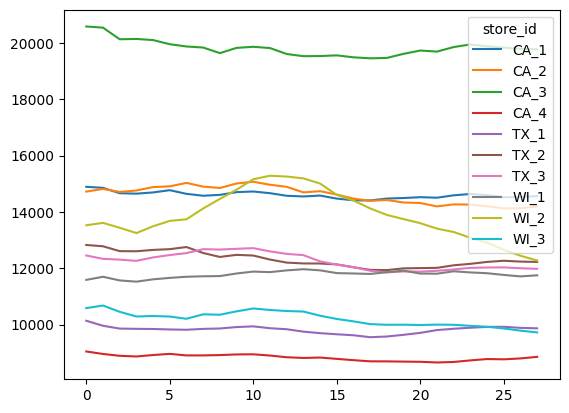

In [124]:
varmax_processed_ma_prediction, varmax_processed_prediction, varmax_full_data = (
    process_ma_prediction(data, varma_ma_data, varmax_predictions)
)
varmax_processed_ma_prediction.plot()

<Axes: >

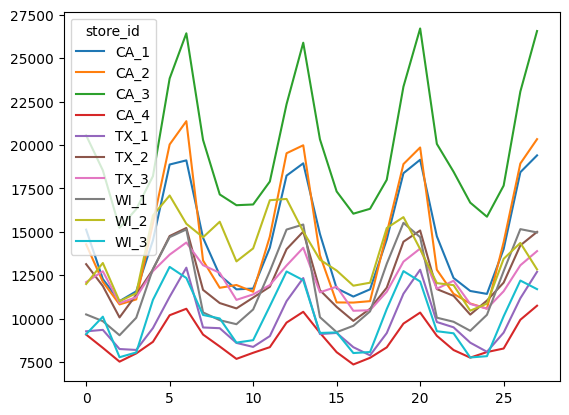

In [125]:
varmax_processed_prediction.plot()

### Post-estimation analysis


In [126]:
# Get normality test results
varmax_normality_test = varmax_model_fit.test_normality()
print(varmax_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     9.030e+05          31.41   0.000 20
----------------------------------------


In [127]:
varmax_whiteness_test = varmax_model_fit.test_whiteness(nlags=35)
print(varmax_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 35 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         2081.          658.1   0.000 600
-----------------------------------------


### Submission generation

In [128]:
varmax_submission_file = "full_varmax.csv"
generate_submission(varmax_submission_file, varmax_processed_prediction)